In [ ]:
import pandas as pd
import numpy as np

Feature Selection

adalah salah satu teknik penting dan seting di gunakan dalam tahap pre-processing/
Teknik ini mengurangi jumlah fitur yang terlibat dalam menentukan suatu nilai kelas target.
fitur yang diabaikan biasanya berupa fitur yang tidak relevan dan data berlebihan. tujuan utama dari seleksi fitur ialah memilih fitur terbaik dari suatu dari suatu kumpulan data fitur.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kuliah/Smester 5/big data & data mining/p6/StudentPerformance .csv');
df.head()

,id_mhs,nama,jenis_kelamin,umur,jurusan,konsentrasi,asal,kos,uang_saku,paket_data,...,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,1,Julianto,Pria,19,Informatika,Pemrograman,Yogyakarta,Tidak,200000,50000,...,Tidak,2,92,3,Tidak,Ya,41,170,3.86,Ya
1,2,Siti Muniroh,Wanita,19,Informatika,Jaringan,Jakarta,Ya,500000,70000,...,Tidak,1,94,0,Tidak,Tidak,38,150,3.96,Ya
2,3,Achmad Sandi,Pria,19,Informatika,Multimedia,Yogyakarta,Tidak,300000,100000,...,Tidak,1,90,3,Tidak,Ya,42,172,3.68,Tidak
3,4,Adam Sautin,Pria,21,Informatika,Jaringan,Yogyakarta,Tidak,700000,100000,...,Tidak,2,93,2,Tidak,Ya,41,168,3.69,Tidak
4,5,Ade R. S1rief,Pria,19,Informatika,Multimedia,Surabaya,Ya,800000,80000,...,Tidak,2,112,3,Tidak,Ya,40,164,3.68,Tidak


In [ ]:
df.dtypes

id_mhs                        int64
nama                         object
jenis_kelamin                object
umur                          int64
jurusan                      object
konsentrasi                  object
asal                         object
kos                          object
uang_saku                     int64
paket_data                    int64
kendaraan                    object
laptop                       object
tipe_laptop                  object
status_menikah               object
ip_sem1                     float64
ip_sem2                     float64
ip_sem3                     float64
ip_sem4                     float64
persentase_presensi           int64
kacamata                     object
gamer                        object
durasi_sosmed (jam/hari)      int64
jumlah_akun_sosmed            int64
clubbing                     object
jumlah_org                    int64
score_toefl                   int64
jumlah_lomba                  int64
keadaan_ortu_divorced       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_mhs                    150 non-null    int64  
 1   nama                      150 non-null    object 
 2   jenis_kelamin             150 non-null    object 
 3   umur                      150 non-null    int64  
 4   jurusan                   150 non-null    object 
 5   konsentrasi               150 non-null    object 
 6   asal                      150 non-null    object 
 7   kos                       150 non-null    object 
 8   uang_saku                 150 non-null    int64  
 9   paket_data                150 non-null    int64  
 10  kendaraan                 150 non-null    object 
 11  laptop                    150 non-null    object 
 12  tipe_laptop               150 non-null    object 
 13  status_menikah            150 non-null    object 
 14  ip_sem1   

In [ ]:
df.isna()

,id_mhs,nama,jenis_kelamin,umur,jurusan,konsentrasi,asal,kos,uang_saku,paket_data,...,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,id_mhs,umur,uang_saku,paket_data,ip_sem1,ip_sem2,ip_sem3,ip_sem4,persentase_presensi,durasi_sosmed (jam/hari),jumlah_akun_sosmed,jumlah_org,score_toefl,jumlah_lomba,ukuran_sepatu,tinggi_badan,ipk
count,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000
mean,75.500000,23.553333,7.813333e+05,115633.333333,3.496000,3.484667,3.469333,3.525267,63.326667,4.686667,3.233333,2.086667,71.353333,0.586667,38.12000,165.993333,3.496133
std,43.445368,2.459161,3.765592e+05,48081.644304,0.340771,0.303002,0.320381,0.321452,20.235691,2.204744,1.453608,0.850871,23.937597,1.153848,3.66357,14.033754,0.159499
min,1.000000,19.000000,2.000000e+05,40000.000000,3.000000,3.000000,3.000000,3.000000,40.000000,1.000000,1.000000,0.000000,40.000000,0.000000,32.00000,140.000000,3.130000
25%,38.250000,22.000000,5.000000e+05,70000.000000,3.200000,3.200000,3.200000,3.200000,47.250000,3.000000,2.000000,2.000000,52.250000,0.000000,35.00000,154.000000,3.400000
50%,75.500000,24.000000,8.000000e+05,120000.000000,3.500000,3.500000,3.450000,3.600000,55.000000,5.000000,3.000000,2.000000,63.500000,0.000000,38.00000,166.500000,3.500000
75%,112.750000,26.000000,1.100000e+06,150000.000000,3.800000,3.787500,3.787500,3.800000,87.750000,7.000000,5.000000,3.000000,92.750000,0.000000,41.00000,178.000000,3.600000
max,150.000000,27.000000,1.400000e+06,200000.000000,4.000000,4.000000,4.000000,4.000000,100.000000,8.000000,5.000000,3.000000,119.000000,4.000000,44.00000,190.000000,3.960000


In [ ]:
df.isna().count()

id_mhs                      150
nama                        150
jenis_kelamin               150
umur                        150
jurusan                     150
konsentrasi                 150
asal                        150
kos                         150
uang_saku                   150
paket_data                  150
kendaraan                   150
laptop                      150
tipe_laptop                 150
status_menikah              150
ip_sem1                     150
ip_sem2                     150
ip_sem3                     150
ip_sem4                     150
persentase_presensi         150
kacamata                    150
gamer                       150
durasi_sosmed (jam/hari)    150
jumlah_akun_sosmed          150
clubbing                    150
jumlah_org                  150
score_toefl                 150
jumlah_lomba                150
keadaan_ortu_divorced       150
romance                     150
ukuran_sepatu               150
tinggi_badan                150
ipk     

In [ ]:
df.isna().sum()

id_mhs                      0
nama                        0
jenis_kelamin               0
umur                        0
jurusan                     0
konsentrasi                 0
asal                        0
kos                         0
uang_saku                   0
paket_data                  0
kendaraan                   0
laptop                      0
tipe_laptop                 0
status_menikah              0
ip_sem1                     0
ip_sem2                     0
ip_sem3                     0
ip_sem4                     0
persentase_presensi         0
kacamata                    0
gamer                       0
durasi_sosmed (jam/hari)    0
jumlah_akun_sosmed          0
clubbing                    0
jumlah_org                  0
score_toefl                 0
jumlah_lomba                0
keadaan_ortu_divorced       0
romance                     0
ukuran_sepatu               0
tinggi_badan                0
ipk                         0
lulus_tepatwaktu            0
dtype: int

In [ ]:
from sklearn.preprocessing import LabelEncoder

convert_dict = {
    'konsentrasi':'category',
    'asal':'category',
    'kendaraan':'category',
    'tipe_laptop':'category'
}

df = df.astype(convert_dict)
labelencoder = LabelEncoder()

df['konsentrasi']  = labelencoder.fit_transform(df['konsentrasi'])
df['asal']  = labelencoder.fit_transform(df['asal'])
df['kendaraan']  = labelencoder.fit_transform(df['kendaraan'])
df['tipe_laptop']  = labelencoder.fit_transform(df['tipe_laptop'])



In [ ]:
df.dtypes


id_mhs                        int64
nama                         object
jenis_kelamin                object
umur                          int64
jurusan                      object
konsentrasi                   int64
asal                          int64
kos                          object
uang_saku                     int64
paket_data                    int64
kendaraan                     int64
laptop                       object
tipe_laptop                   int64
status_menikah               object
ip_sem1                     float64
ip_sem2                     float64
ip_sem3                     float64
ip_sem4                     float64
persentase_presensi           int64
kacamata                     object
gamer                        object
durasi_sosmed (jam/hari)      int64
jumlah_akun_sosmed            int64
clubbing                     object
jumlah_org                    int64
score_toefl                   int64
jumlah_lomba                  int64
keadaan_ortu_divorced       

In [ ]:
df['lulus_tepatwaktu']

0         Ya
1         Ya
2      Tidak
3      Tidak
4      Tidak
       ...  
145    Tidak
146    Tidak
147    Tidak
148       Ya
149    Tidak
Name: lulus_tepatwaktu, Length: 150, dtype: object

In [ ]:
df.head()

,id_mhs,nama,jenis_kelamin,umur,jurusan,konsentrasi,asal,kos,uang_saku,paket_data,...,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,1,Julianto,Pria,19,Informatika,Pemrograman,Yogyakarta,Tidak,200000,50000,...,Tidak,2,92,3,Tidak,Ya,41,170,3.86,Ya
1,2,Siti Muniroh,Wanita,19,Informatika,Jaringan,Jakarta,Ya,500000,70000,...,Tidak,1,94,0,Tidak,Tidak,38,150,3.96,Ya
2,3,Achmad Sandi,Pria,19,Informatika,Multimedia,Yogyakarta,Tidak,300000,100000,...,Tidak,1,90,3,Tidak,Ya,42,172,3.68,Tidak
3,4,Adam Sautin,Pria,21,Informatika,Jaringan,Yogyakarta,Tidak,700000,100000,...,Tidak,2,93,2,Tidak,Ya,41,168,3.69,Tidak
4,5,Ade R. S1rief,Pria,19,Informatika,Multimedia,Surabaya,Ya,800000,80000,...,Tidak,2,112,3,Tidak,Ya,40,164,3.68,Tidak


In [ ]:
num_kelamin = {
    'Pria' : 0,
    'Wanita' : 1
}

num_ya_tidak = {
    'Tidak' : 0,
    'Ya' : 1
}
# manual
df['jenis_kelamin'] = df['jenis_kelamin'].map(num_kelamin)
df['kos'] = df['kos'].map(num_ya_tidak)
df['laptop'] = df['laptop'].map(num_ya_tidak)
df['status_menikah'] = df['status_menikah'].map(num_ya_tidak)
df['kacamata'] = df['kacamata'].map(num_ya_tidak)
df['romance'] = df['romance'].map(num_ya_tidak)
df['lulus_tepatwaktu'] = df['lulus_tepatwaktu'].map(num_ya_tidak)


In [ ]:
#cara lain
cols=['jenis_kelamin','kos','laptop','status_menikah','kacamata','romance','lulus_tepatwaktu','clubbing', 'keadaan_ortu_divorced','romance','lulus_tepatwaktu','gamer']
le = LabelEncoder()
for col in cols:
  df[col]=le.fit_transform(df[col])
df.head()


,id_mhs,nama,jenis_kelamin,umur,jurusan,konsentrasi,asal,kos,uang_saku,paket_data,...,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,1,Julianto,0,19,Informatika,2,12,0,200000,50000,...,0,2,92,3,0,1,41,170,3.86,1
1,2,Siti Muniroh,1,19,Informatika,0,3,1,500000,70000,...,0,1,94,0,0,0,38,150,3.96,1
2,3,Achmad Sandi,0,19,Informatika,1,12,0,300000,100000,...,0,1,90,3,0,1,42,172,3.68,0
3,4,Adam Sautin,0,21,Informatika,0,12,0,700000,100000,...,0,2,93,2,0,1,41,168,3.69,0
4,5,Ade R. S1rief,0,19,Informatika,1,11,1,800000,80000,...,0,2,112,3,0,1,40,164,3.68,0


In [ ]:
df.head()

,id_mhs,nama,jenis_kelamin,umur,jurusan,konsentrasi,asal,kos,uang_saku,paket_data,...,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,1,Julianto,0,19,Informatika,2,12,0,200000,50000,...,0,2,92,3,0,1,41,170,3.86,1
1,2,Siti Muniroh,1,19,Informatika,0,3,1,500000,70000,...,0,1,94,0,0,0,38,150,3.96,1
2,3,Achmad Sandi,0,19,Informatika,1,12,0,300000,100000,...,0,1,90,3,0,1,42,172,3.68,0
3,4,Adam Sautin,0,21,Informatika,0,12,0,700000,100000,...,0,2,93,2,0,1,41,168,3.69,0
4,5,Ade R. S1rief,0,19,Informatika,1,11,1,800000,80000,...,0,2,112,3,0,1,40,164,3.68,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_mhs                    150 non-null    int64  
 1   nama                      150 non-null    object 
 2   jenis_kelamin             150 non-null    int64  
 3   umur                      150 non-null    int64  
 4   jurusan                   150 non-null    object 
 5   konsentrasi               150 non-null    int64  
 6   asal                      150 non-null    int64  
 7   kos                       150 non-null    int64  
 8   uang_saku                 150 non-null    int64  
 9   paket_data                150 non-null    int64  
 10  kendaraan                 150 non-null    int64  
 11  laptop                    150 non-null    int64  
 12  tipe_laptop               150 non-null    int64  
 13  status_menikah            150 non-null    int64  
 14  ip_sem1   

In [ ]:
columns = ['id_mhs','nama', 'jurusan']
df.drop(columns, inplace=True, axis=1)


In [ ]:
df.head()

,jenis_kelamin,umur,konsentrasi,asal,kos,uang_saku,paket_data,kendaraan,laptop,tipe_laptop,...,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,ipk,lulus_tepatwaktu
0,0,19,Pemrograman,Yogyakarta,0,200000,50000,Motor,1,ASUS,...,Tidak,2,92,3,Tidak,1,41,170,3.86,1
1,1,19,Jaringan,Jakarta,1,500000,70000,Mobil,1,MacBook,...,Tidak,1,94,0,Tidak,0,38,150,3.96,1
2,0,19,Multimedia,Yogyakarta,0,300000,100000,Motor,1,Acer,...,Tidak,1,90,3,Tidak,1,42,172,3.68,0
3,0,21,Jaringan,Yogyakarta,0,700000,100000,Sepeda,1,Lenovo,...,Tidak,2,93,2,Tidak,1,41,168,3.69,0
4,0,19,Multimedia,Surabaya,1,800000,80000,Mobil,1,Macbook,...,Tidak,2,112,3,Tidak,1,40,164,3.68,0


Fileter Method

Analisis korelasi adalahteknik analisis yang di gunakan utuk mengukur kuat lemah nya hubungan dua variabel. varaiabel ini terdiri darai variabel bebas dan tergantung.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

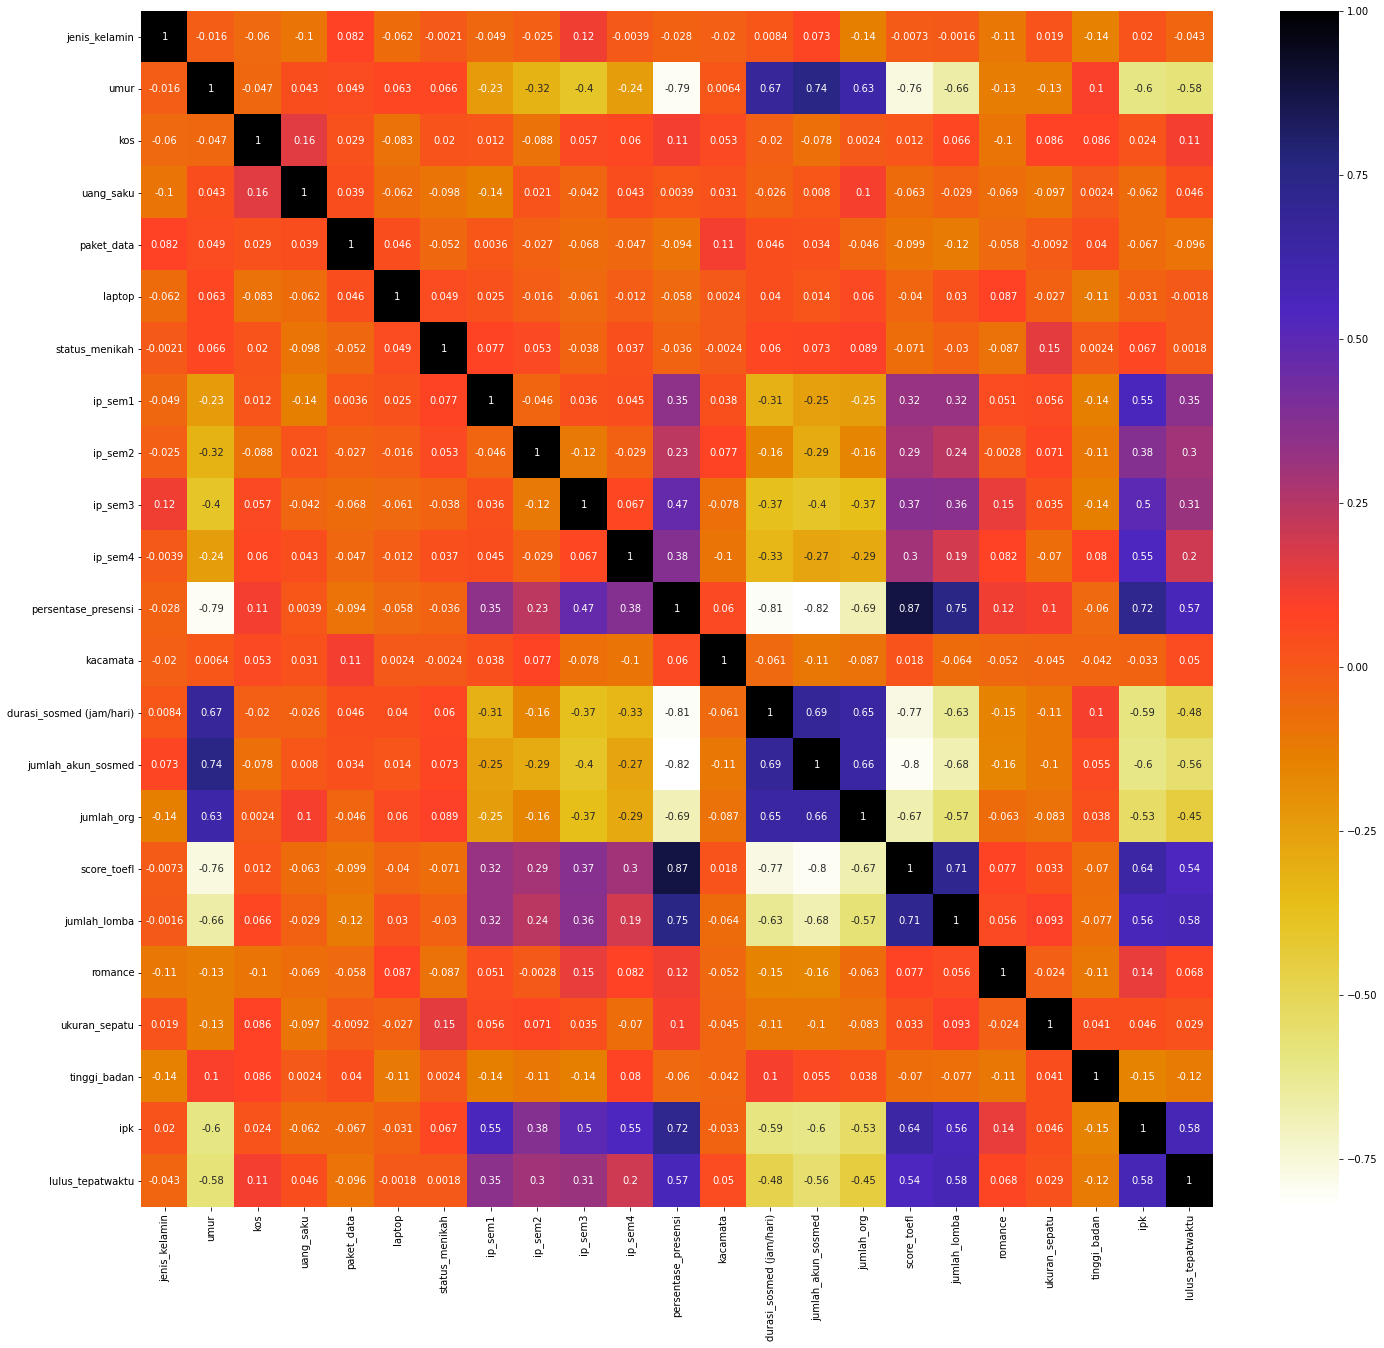

In [ ]:
corr = df.corr()
plt.figure(figsize=(24,22))
sns.heatmap(corr, cmap=plt.cm.CMRmap_r, annot=True)
plt.show()

In [ ]:
cor_target = abs(corr['ipk'])
relevant_features = cor_target[cor_target>0.6]
relevant_features


umur                   0.600057
persentase_presensi    0.715748
jumlah_akun_sosmed     0.604844
score_toefl            0.640401
ipk                    1.000000
Name: ipk, dtype: float64

In [ ]:
print('\n',df[["umur", "persentase_presensi"]].corr())
print('\n',df[["umur", "jumlah_akun_sosmed"]].corr())

print('\n',df[["umur", "score_toefl"]].corr())
print('\n',df[["persentase_presensi", "jumlah_akun_sosmed"]].corr())

print('\n',df[["persentase_presensi", "score_toefl"]].corr())
print('\n',df[["umur", "score_toefl"]].corr())


                          umur  persentase_presensi
umur                 1.000000            -0.794927
persentase_presensi -0.794927             1.000000

                         umur  jumlah_akun_sosmed
umur                1.000000            0.744678
jumlah_akun_sosmed  0.744678            1.000000

                 umur  score_toefl
umur         1.00000     -0.76448
score_toefl -0.76448      1.00000

                      persentase_presensi  jumlah_akun_sosmed
persentase_presensi             1.000000           -0.822861
jumlah_akun_sosmed             -0.822861            1.000000

                      persentase_presensi  score_toefl
persentase_presensi             1.000000     0.872809
score_toefl                     0.872809     1.000000

                 umur  score_toefl
umur         1.00000     -0.76448
score_toefl -0.76448      1.00000


wreapper method 

membutuhkan suatu jenis algoritma machine learning dan menggunakan kinerjanya sebagai 


forward Selection



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = df.drop('ipk', 1)
Y = df["ipk"]

In [ ]:
import statsmodels.api as sm

In [ ]:
def forward_selection(data, target, significance_level=0.05): #Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
    initial_features = data.columns.tolist() #convert kolom ke dalam bentuk list
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
		        break
    return best_features
  



In [ ]:
forward_selection(X,Y)

['persentase_presensi',
 'clubbing',
 'lulus_tepatwaktu',
 'ip_sem4',
 'ip_sem1',
 'ip_sem2',
 'ip_sem3']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   jenis_kelamin             150 non-null    int64  
 1   umur                      150 non-null    int64  
 2   konsentrasi               150 non-null    int64  
 3   asal                      150 non-null    int64  
 4   kos                       150 non-null    int64  
 5   uang_saku                 150 non-null    int64  
 6   paket_data                150 non-null    int64  
 7   kendaraan                 150 non-null    int64  
 8   laptop                    150 non-null    int64  
 9   tipe_laptop               150 non-null    int64  
 10  status_menikah            150 non-null    int64  
 11  ip_sem1                   150 non-null    float64
 12  ip_sem2                   150 non-null    float64
 13  ip_sem3                   150 non-null    float64
 14  ip_sem4   